<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Открытие-и-изучение-данных" data-toc-modified-id="Открытие-и-изучение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Открытие и изучение данных</a></span></li><li><span><a href="#Расчет-recovery" data-toc-modified-id="Расчет-recovery-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Расчет recovery</a></span></li><li><span><a href="#Анализ-признаков,-недоступных-в-тестовой-выборке" data-toc-modified-id="Анализ-признаков,-недоступных-в-тестовой-выборке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ признаков, недоступных в тестовой выборке</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Посмотрим,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки" data-toc-modified-id="Посмотрим,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки</a></span></li><li><span><a href="#Сравним-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Сравним-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравним распределения размеров гранул сырья на обучающей и тестовой выборках</a></span></li><li><span><a href="#Исследуем-суммарную-концентрацию-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах" data-toc-modified-id="Исследуем-суммарную-концентрацию-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Напишем-функцию-для-вычисление-итоговой-sMAPE" data-toc-modified-id="Напишем-функцию-для-вычисление-итоговой-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Напишем функцию для вычисление итоговой sMAPE</a></span></li><li><span><a href="#Обучим-разные-модели-и-оценим-их-качество-кросс-валидацией.-Выберем-лучшую-модель-и-проверим-её-на-тестовой-выборке" data-toc-modified-id="Обучим-разные-модели-и-оценим-их-качество-кросс-валидацией.-Выберем-лучшую-модель-и-проверим-её-на-тестовой-выборке-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучим разные модели и оценим их качество кросс-валидацией. Выберем лучшую модель и проверим её на тестовой выборке</a></span></li><li><span><a href="#Проверка-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-модели-на-тестовой-выборке-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Проверка модели на тестовой выборке</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовим прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используем данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Нам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, будем обращаться к библиотекам *pandas*, *matplotlib* и *sklearn.*


# Описание данных

Технологический процесс

- Rougher feed — исходное сырье
- Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
  - Xanthate — ксантогенат (промотер, или активатор флотации);
  - Sulphate — сульфат (на данном производстве сульфид натрия);
  - Depressant — депрессант (силикат натрия).
- Rougher process (англ. «грубый процесс») — флотация
- Rougher tails — отвальные хвосты
- Float banks — флотационная установка
- Cleaner process — очистка
- Rougher Au — черновой концентрат золота
- Final Au — финальный концентрат золота

Параметры этапов

- air amount — объём воздуха
- fluid levels — уровень жидкости
- feed size — размер гранул сырья
- feed rate — скорость подачи

Наименование признаков

Наименование признаков должно быть такое:

[этап].[тип_параметра].[название_параметра] Пример: rougher.input.feed_ag

Возможные значения для блока [этап]:

- rougher — флотация
- primary_cleaner — первичная очистка
- secondary_cleaner — вторичная очистка
- final — финальные характеристики

Возможные значения для блока [тип_параметра]:

- input — параметры сырья
- output — параметры продукта state — параметры, характеризующие текущее состояние этапа calculation — расчётные характеристики

## Подготовка данных

### Открытие и изучение данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
from sklearn.pipeline import  make_pipeline
import matplotlib.pyplot as plt 
import scipy as sp
import scipy.stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from numpy.random import RandomState
state = RandomState(12345)

In [2]:
TEST_DATA = pd.read_csv('/datasets/gold_recovery_test_new.csv')
TEST_DATA.name = 'TEST_DATA'
TEST_DATA.info()
TEST_DATA.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [3]:
TRAIN_DATA = pd.read_csv('/datasets/gold_recovery_train_new.csv')
TRAIN_DATA.name = 'TRAIN_DATA'
TRAIN_DATA.info()
TRAIN_DATA.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
FULL_DATA = pd.read_csv('/datasets/gold_recovery_full_new.csv')
FULL_DATA.name = 'FULL_DATA'
FULL_DATA.info()
FULL_DATA.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


### Расчет recovery

In [5]:
#C - доля золота в концентрате после флотации/очистки;
#F - доля золота в сырье/концентрате до флотации/очистки;
#T - доля золота в отвальных хвостах после флотации/очистки.
def calculate_recovery(c, f, t):
    recovery = ((c*(f-t))/(f*(c-t)))*100
    #recovery = recovery.fillna(0.0)
    #recovery = recovery.replace([np.inf, -np.inf], 0.0)
    return recovery

Сформируем датасет без нулевых значений и значений NaN

In [6]:
train_drop = TRAIN_DATA.dropna().copy()
train_clean = train_drop.loc[(train_drop != 0).any(axis=1)]

len(train_clean)

11017

In [7]:
test_drop = TEST_DATA.dropna().copy()
test_clean = test_drop.loc[(test_drop != 0).any(axis=1)]

len(test_clean)

5229

Рассчитаем recovery

In [8]:
recovery_calculated = calculate_recovery(train_clean['rougher.output.concentrate_au'],
                                        train_clean['rougher.input.feed_au'],
                                        train_clean['rougher.output.tail_au'])
recovery_calculated

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Length: 11017, dtype: float64

Сравним результат

In [9]:
rec = TRAIN_DATA.dropna()
recovery = rec.loc[(rec != 0).any(axis=1)]
recovery['rougher.output.recovery']

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Name: rougher.output.recovery, Length: 11017, dtype: float64

Рассчитаем МАЕ между нашими расчетамми и данными в предоставленном датасете

In [10]:
MAE(recovery['rougher.output.recovery'], recovery_calculated)

9.82970122149377e-15

# Вывод

По полученным результатам можно сделать вывод, что измерения, предоставленные в датасете достоверные

### Анализ признаков, недоступных в тестовой выборке

Для начала расчитаем количество столбцов в обучающей и тестовой выборках

In [11]:
len(TRAIN_DATA.columns), len(TEST_DATA.columns)

(87, 53)

Чтобы изучить датасет на предмет отсутствия столбцов в тестовой выборке, создадим переменные и сформируем список отсутствующих столбцов

In [12]:
TRAIN_DATA_columns = TRAIN_DATA.columns
TEST_DATA_columns = TEST_DATA.columns

columns_missing = set(TRAIN_DATA.columns) - set(TEST_DATA.columns)
columns_missing

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

...и список совпадающих столбцов

In [13]:
columns_same = TRAIN_DATA_columns[TRAIN_DATA_columns.isin(TEST_DATA_columns)]
columns_same

Index(['date', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'roughe

В тестовой выборке отсутствуют результаты технологического процесса

### Предобработка данных

Проверим датаметы на наличие дубликатов использяю функцию

In [14]:
for data in TRAIN_DATA, TEST_DATA, FULL_DATA:
    duplicates = data.duplicated().sum()
    print( data.name, ':', duplicates)

TRAIN_DATA : 0
TEST_DATA : 0
FULL_DATA : 0


Проверим каждый датасет на количество NaN и заменим эти значения также используя функцию

In [15]:
for data in TRAIN_DATA, TEST_DATA, FULL_DATA:
    nan_sum = (data.isna().sum())
    total_nan = pd.Series(nan_sum).sum()
    print( data.name, ':', total_nan)

TRAIN_DATA : 4100
TEST_DATA : 90
FULL_DATA : 4481


In [16]:
def fill_nan(data):
    data = data.fillna(method = 'ffill')
    return data

In [17]:
TRAIN_DATA_filled = fill_nan(TRAIN_DATA) 
TEST_DATA_filled = fill_nan(TEST_DATA)
FULL_DATA_filled = fill_nan(FULL_DATA) 

Назначим имена столбцов и проверим результат работы функции по заполнению NaN

In [18]:
TRAIN_DATA_filled.name = 'TRAIN_DATA_filled'
TEST_DATA_filled.name = 'TEST_DATA_filled'
FULL_DATA_filled.name = 'FULL_DATA_filled'

for data in TRAIN_DATA_filled, TEST_DATA_filled, FULL_DATA_filled:
    nan_count = data.isna().sum()
    total_count = pd.Series(nan_count).sum()
    print(data.name, ':', total_count)

TRAIN_DATA_filled : 0
TEST_DATA_filled : 0
FULL_DATA_filled : 0


Для дальнейшего удобства в работе с данными разобьем дату по столбцам и уберем сам столбец date в тренировочной выборке

In [19]:
TRAIN_DATA_filled['year'] = pd.DatetimeIndex(TRAIN_DATA_filled['date']).year # год
TRAIN_DATA_filled['month'] = pd.DatetimeIndex(TRAIN_DATA_filled['date']).month # месяц
TRAIN_DATA_filled['day'] = pd.DatetimeIndex(TRAIN_DATA_filled['date']).day # дни
TRAIN_DATA_filled['hour'] = pd.DatetimeIndex(TRAIN_DATA_filled['date']).hour # час
TRAIN_DATA_filled['minute'] = pd.DatetimeIndex(TRAIN_DATA_filled['date']).minute # минуты
TRAIN_DATA_filled['second'] = pd.DatetimeIndex(TRAIN_DATA_filled['date']).second # секунды

# Удаление столбца дата
TRAIN_DATA_filled = TRAIN_DATA_filled.drop('date', axis =1)
TRAIN_DATA_filled.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,year,month,day,hour,minute,second
0,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,8.079666,-500.470978,14.151341,-605.841980,2016,1,15,0,0,0
1,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,7.984757,-500.582168,13.998353,-599.787184,2016,1,15,1,0,0
2,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,8.013877,-500.517572,14.028663,-601.427363,2016,1,15,2,0,0
3,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,7.977324,-500.255908,14.005551,-599.996129,2016,1,15,3,0,0
4,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,7.894242,-500.356035,13.996647,-601.496691,2016,1,15,4,0,0


## Анализ данных

### Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки

Начнем с анализа Au

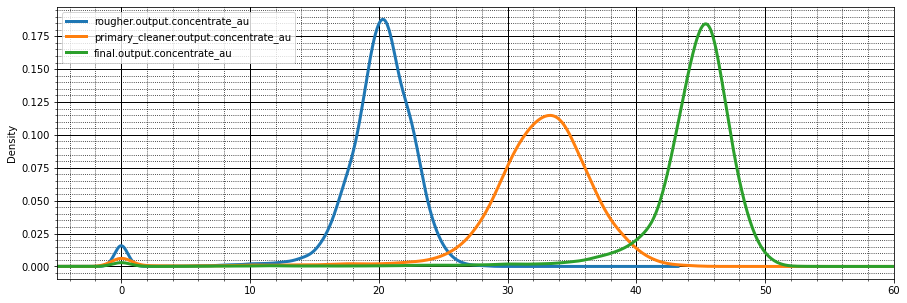

In [20]:
fig, ax = plt.subplots()
FULL_DATA_filled['rougher.output.concentrate_au'].plot(kind ='kde', figsize = (15,5) , linewidth = 3)
#FULL_DATA['rougher.output.tail_au'].plot(kind ='kde')
FULL_DATA_filled['primary_cleaner.output.concentrate_au'].plot(kind ='kde', linewidth = 3)
#FULL_DATA['primary_cleaner.output.tail_au'].plot(kind ='kde') 
#FULL_DATA['secondary_cleaner.output.tail_au'].plot(kind ='kde')
FULL_DATA_filled['final.output.concentrate_au'].plot(kind ='kde' , linewidth = 3)
#FULL_DATA['final.output.tail_au'].plot(kind ='kde')
ax.minorticks_on()
ax.grid(which='major',
        color = 'k', 
        linewidth = 1)
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.legend()

plt.xlim(-5,60)

plt.show()


На каждом этапе перероботки концентрация Au увеличивается

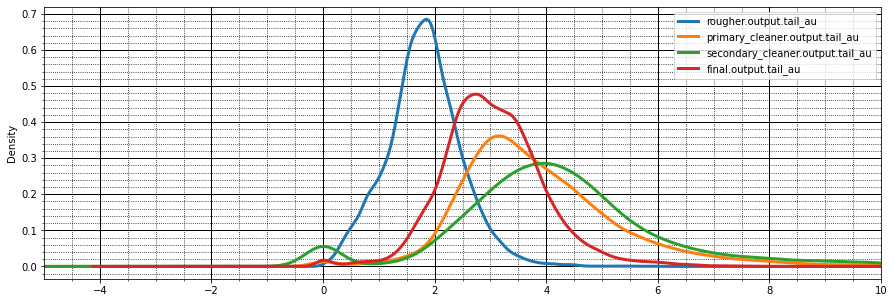

In [21]:
fig, ax = plt.subplots()
FULL_DATA_filled['rougher.output.tail_au'].plot(kind ='kde', figsize= (15,5), linewidth = 3)
FULL_DATA_filled['primary_cleaner.output.tail_au'].plot(kind ='kde', figsize = (15,5), linewidth = 3) 
FULL_DATA_filled['secondary_cleaner.output.tail_au'].plot(kind ='kde', linewidth = 3)
FULL_DATA_filled['final.output.tail_au'].plot(kind ='kde' , linewidth = 3)
ax.minorticks_on()
ax.grid(which='major',
        color = 'k', 
        linewidth = 1)
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.legend()
plt.xlim(-5,10)
plt.show()


Также мы наблюдаем увеличение концентрации отвала Au

Проанализируем концентрацию Ag на разных этапах

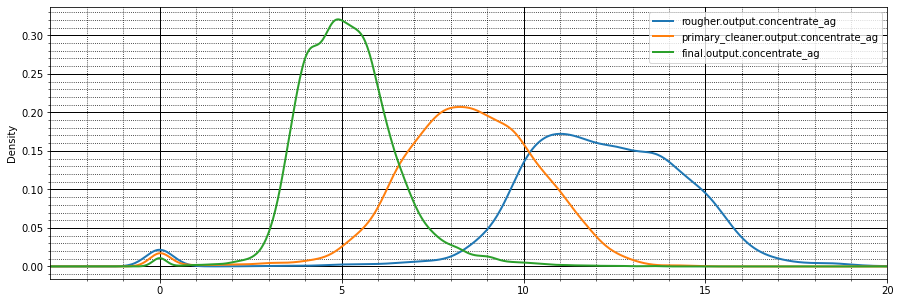

In [22]:
fig, ax = plt.subplots()
FULL_DATA_filled['rougher.output.concentrate_ag'].plot(kind ='kde', figsize = (15,5), linewidth = 2)
#FULL_DATA['rougher.output.tail_ag'].plot(kind ='kde')
FULL_DATA_filled['primary_cleaner.output.concentrate_ag'].plot(kind ='kde', linewidth = 2)
#FULL_DATA['primary_cleaner.output.tail_ag'].plot(kind ='kde') 
#FULL_DATA['secondary_cleaner.output.tail_ag'].plot(kind ='kde')
FULL_DATA_filled['final.output.concentrate_ag'].plot(kind ='kde', linewidth = 2)
#FULL_DATA['final.output.tail_ag'].plot(kind ='kde')
ax.minorticks_on()
ax.grid(which='major',
        color = 'k', 
        linewidth = 1)
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.legend()
plt.xlim(-3,20)
plt.show()
plt.show()

Концентрация Ag на каждом этапе уменьшается. Также мы можем наблюдать достаточно много околонулевых значений. Это может быть потеря данных или остановка производства

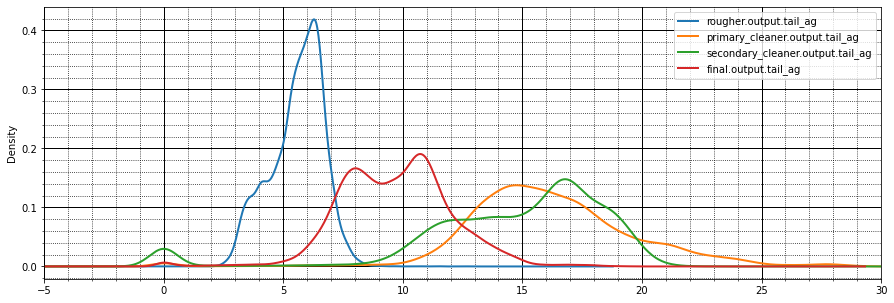

In [23]:
fig, ax = plt.subplots()
FULL_DATA_filled['rougher.output.tail_ag'].plot(kind ='kde', figsize= (15,5), linewidth = 2)
FULL_DATA_filled['primary_cleaner.output.tail_ag'].plot(kind ='kde', linewidth = 2) 
FULL_DATA_filled['secondary_cleaner.output.tail_ag'].plot(kind ='kde', linewidth = 2)
FULL_DATA_filled['final.output.tail_ag'].plot(kind ='kde', linewidth = 2)
ax.minorticks_on()
ax.grid(which='major',
        color = 'k', 
        linewidth = 1)
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.legend()
plt.xlim(-5,30)
plt.show()
plt.show()


Концентрация отвала Ag на каждом этапе увеличивается

Проанализируем концентрацию Pb

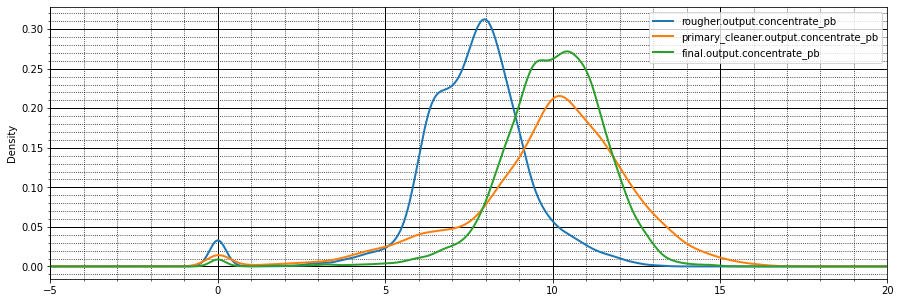

In [24]:
ffig, ax = plt.subplots()
FULL_DATA_filled['rougher.output.concentrate_pb'].plot(kind ='kde', figsize = (15,5), linewidth = 2)
#FULL_DATA['rougher.output.tail_pb'].plot(kind ='kde')
FULL_DATA_filled['primary_cleaner.output.concentrate_pb'].plot(kind ='kde' , linewidth = 2)
#FULL_DATA['primary_cleaner.output.tail_pb'].plot(kind ='kde') 
#FULL_DATA['secondary_cleaner.output.tail_pb'].plot(kind ='kde')
FULL_DATA_filled['final.output.concentrate_pb'].plot(kind ='kde'  , linewidth = 2)
#FULL_DATA['final.output.tail_pb'].plot(kind ='kde')
ax.minorticks_on()
ax.grid(which='major',
        color = 'k', 
        linewidth = 1)
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.legend()
plt.xlim(-5,20)
plt.show()


В отличии от Au и Ag концентрация Pb на каждом этапе уменьшается

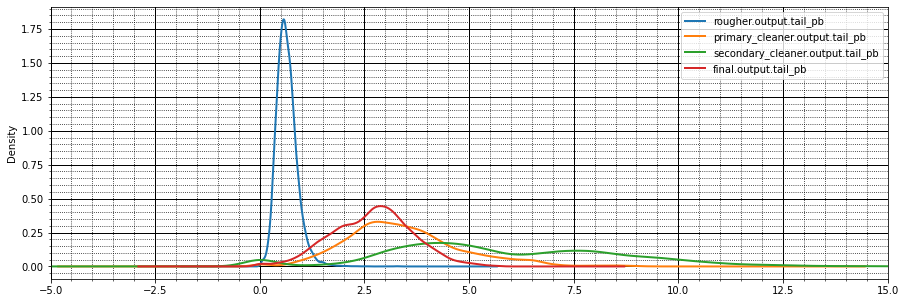

In [25]:
fig, ax = plt.subplots()
FULL_DATA_filled['rougher.output.tail_pb'].plot(kind ='kde', figsize= (15,5) , linewidth = 2)
FULL_DATA_filled['primary_cleaner.output.tail_pb'].plot(kind ='kde', linewidth = 2) 
FULL_DATA_filled['secondary_cleaner.output.tail_pb'].plot(kind ='kde', linewidth = 2)
FULL_DATA_filled['final.output.tail_pb'].plot(kind ='kde', linewidth = 2)
ax.minorticks_on()
ax.grid(which='major',
        color = 'k', 
        linewidth = 1)
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.legend()
plt.xlim(-5,15)
plt.show()

Концентрация отвала Pb на каждом этапе увеличивается

### Сравним распределения размеров гранул сырья на обучающей и тестовой выборках

Для сравнения построим график 

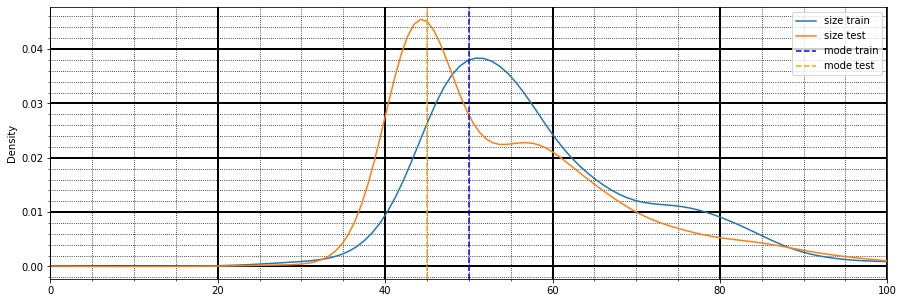

In [26]:
x = TRAIN_DATA_filled['rougher.input.feed_size'].copy()
y = TEST_DATA_filled['rougher.input.feed_size'].copy()

fig, ax = plt.subplots()

x.plot(kind = 'kde', figsize = (15,5), label = 'size train')
y = TEST_DATA_filled['rougher.input.feed_size']
y.plot(kind = 'kde', label = 'size test')
#p.plot(kind = 'kde', figsize = (15,5), label = 'size train clean')
#q.plot(kind = 'kde', figsize = (15,5), label = 'size train clean')

ax.axvline(50, color="blue", linestyle="--", label = 'mode train')
ax.axvline(45, color="orange", linestyle="--", label = 'mode test')
ax.minorticks_on()
ax.grid(which='major',
        color = 'k', 
        linewidth = 2)
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.legend()
plt.xlim(0,100)

plt.show()

Размеры гранул сырья на тестовой и обучающей выборке отличаются лишь на 5 пунтков

### Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах

Чтобы нам продемонстрировать концентрацию всех веществ на разных стадиях, для начала высчитаем, а потом визуализируем

Рассчитаем концентрацию всех веществ в сырье

In [27]:
raw_concentrate = (FULL_DATA_filled['rougher.input.feed_ag'] + FULL_DATA_filled['rougher.input.feed_pb'] 
                   + FULL_DATA_filled['rougher.input.feed_sol'] + FULL_DATA_filled['rougher.input.feed_au'])

Рассчитаем концентрацию всех веществ в черновом концентрате

In [28]:
rougher_concentrate = (FULL_DATA_filled['rougher.output.concentrate_ag'] + FULL_DATA_filled['rougher.output.concentrate_pb'] 
                   + FULL_DATA_filled['rougher.output.concentrate_sol'] + FULL_DATA_filled['rougher.output.concentrate_au'])

Рассчитаем концентрацию всех веществ в финальном концентрате

In [29]:
final_concentrate = (FULL_DATA_filled['final.output.concentrate_ag'] + FULL_DATA_filled['final.output.concentrate_pb'] 
                   + FULL_DATA_filled['final.output.concentrate_sol'] + FULL_DATA_filled['final.output.concentrate_au'])

На основании  наших расчетов построим график

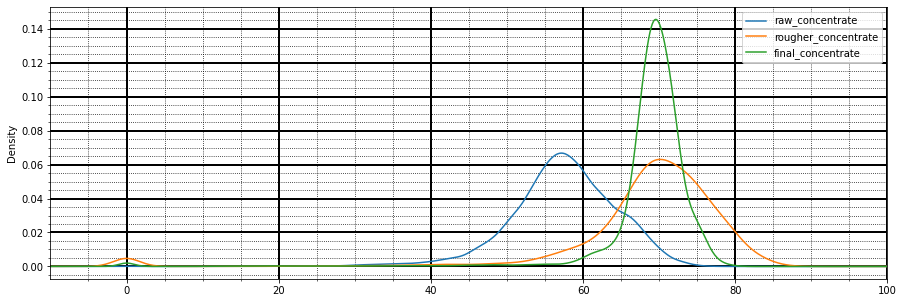

In [30]:
fig, ax = plt.subplots()
raw_concentrate.plot(kind = 'kde', figsize = (15,5), label = 'raw_concentrate')
rougher_concentrate.plot(kind = 'kde', label = 'rougher_concentrate')
final_concentrate.plot(kind = 'kde', label = 'final_concentrate')
ax.minorticks_on()
ax.grid(which='major',
        color = 'k', 
        linewidth = 2)
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.legend()
plt.xlim(-10,100)

plt.show()

Как мы видим из графика после флотации значение концентраций веществ увеличилось, а в финальной концентрации и вовсе

Сформируем данные без аномальных значений

In [31]:
raw_concentrate_normalize = raw_concentrate[raw_concentrate > 1]
rougher_concentrate_normalize = rougher_concentrate[rougher_concentrate > 1]
final_concentrate_normalize = final_concentrate[final_concentrate > 1]

Построим график без аномальных значений

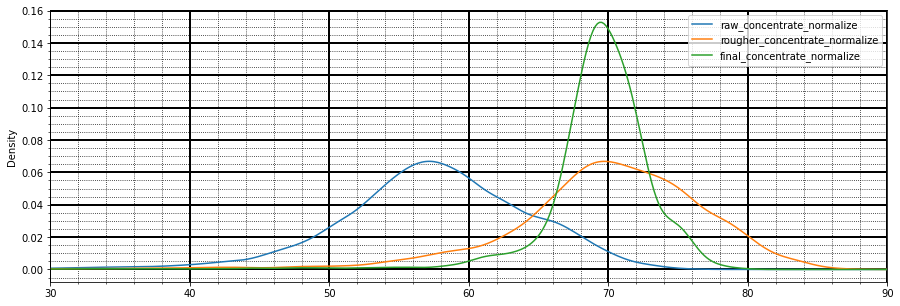

In [32]:
fig, ax = plt.subplots()
raw_concentrate_normalize.plot(kind = 'kde', figsize = (15,5), label = 'raw_concentrate_normalize')
rougher_concentrate_normalize.plot(kind = 'kde', label = 'rougher_concentrate_normalize')
final_concentrate_normalize.plot(kind = 'kde', label = 'final_concentrate_normalize')
ax.minorticks_on()
ax.grid(which='major',
        color = 'k', 
        linewidth = 2)
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.legend()
plt.xlim(30,90)

plt.show()

Без аномальных значений значение концентраций веществ как и положено меньше чем после флотации и в финальной концентрации

## Модель

### Напишем функцию для вычисление итоговой sMAPE

Для начала расчет sMAPE

In [33]:
def smape(target, prediction, multioutput='uniform_average'):
    smape = 100 / len(target) * np.sum(2 * np.abs(prediction - target) / (np.abs(target) + np.abs(prediction)))
    return smape

Теперь расчет итогового sMAPE

In [34]:
def final_smape(rougher, final):
    final_smape = 0.25 * rougher + 0.75 * final
    return final_smape

### Обучим разные модели и оценим их качество кросс-валидацией. Выберем лучшую модель и проверим её на тестовой выборке

Для начала проведем стандартизацию признаков и определим датафрейм признаков стандартизации 

In [35]:
scaler = StandardScaler() 
scaler.fit(TRAIN_DATA_filled)
array_train_scaled = scaler.transform(TRAIN_DATA_filled)
TRAIN_DATA_scaled = pd.DataFrame(array_train_scaled, index=TRAIN_DATA_filled.index , 
                               columns=TRAIN_DATA_filled.columns )

TRAIN_DATA_scaled.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,year,month,day,hour,minute,second
0,0.666992,-0.146960,-1.247732,-0.369366,0.390711,0.347103,-1.716775,2.128453,-0.857904,-0.154580,...,-0.864572,-0.420943,-0.941197,-2.670558,-1.223289,-1.641061,-0.066076,-1.648779,-2.489347,-2.489347
1,0.647983,-0.099043,-1.334174,-0.265472,0.266863,0.368972,-1.684219,2.038638,-0.767407,-0.191516,...,-0.881034,-0.423780,-0.967738,-2.507288,-1.223289,-1.641061,-0.066076,-1.504941,-2.489347,-2.489347
2,0.667374,0.049035,-1.290536,-0.274468,0.155183,0.388105,-1.657503,1.896929,-0.730935,-0.237204,...,-0.875983,-0.422132,-0.962479,-2.551516,-1.223289,-1.641061,-0.066076,-1.361103,-2.489347,-2.489347
3,0.661570,-0.094164,-1.472439,-0.267879,0.177630,0.351760,-1.728660,2.004788,-0.853810,-0.276332,...,-0.882323,-0.415458,-0.966489,-2.512923,-1.223289,-1.641061,-0.066076,-1.217264,-2.489347,-2.489347
4,0.735041,0.005839,-1.444457,-0.250689,0.039649,0.324826,-1.821161,2.002408,-0.955126,-0.384454,...,-0.896733,-0.418012,-0.968033,-2.553386,-1.223289,-1.641061,-0.066076,-1.073426,-2.489347,-2.489347


Определение признаков масштабирования

In [36]:
features_train_scaled_1 = TRAIN_DATA_scaled.drop(columns_missing, axis = 1)
target_train_scaled_1 = TRAIN_DATA_filled['rougher.output.recovery']
target_train_scaled_2 = TRAIN_DATA_filled['final.output.recovery']


features_train_scaled_1.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,year,month,day,hour,minute,second
0,-0.154580,0.377154,-0.117761,0.285633,-0.453621,-0.283904,-0.436246,-0.810391,-0.439519,-0.254349,...,-0.864572,-0.420943,-0.941197,-2.670558,-1.223289,-1.641061,-0.066076,-1.648779,-2.489347,-2.489347
1,-0.191516,0.426914,-0.117761,0.322644,-0.248048,-0.339722,-0.249235,-0.318234,-0.244963,-0.272554,...,-0.881034,-0.423780,-0.967738,-2.507288,-1.223289,-1.641061,-0.066076,-1.504941,-2.489347,-2.489347
2,-0.237204,0.729117,-0.117761,0.292305,-0.050275,-0.314313,-0.062837,-0.340312,-0.051233,-0.316207,...,-0.875983,-0.422132,-0.962479,-2.551516,-1.223289,-1.641061,-0.066076,-1.361103,-2.489347,-2.489347
3,-0.276332,0.730853,-0.117761,0.306874,-0.062640,-0.341034,-0.060758,-0.312616,-0.063891,-0.312218,...,-0.882323,-0.415458,-0.966489,-2.512923,-1.223289,-1.641061,-0.066076,-1.217264,-2.489347,-2.489347
4,-0.384454,0.906088,-0.117761,0.341826,-0.051961,-0.285677,-0.054819,-0.331845,-0.069271,-0.316714,...,-0.896733,-0.418012,-0.968033,-2.553386,-1.223289,-1.641061,-0.066076,-1.073426,-2.489347,-2.489347


Подберем параметры модели и матрицу гиперпараметров

In [37]:
smape_score = make_scorer(smape, greater_is_better= False )

In [38]:
param_dist_dt = {"max_depth":range(1,101,10) ,
                "min_samples_leaf": [ 1, 0.5, 2],
                 }

Кросс валидация регрессии дерево решений и обучение на масштабированные признаки и с расширением признаков по дате

In [39]:
dt_cv = GridSearchCV(DecisionTreeRegressor(random_state = 12345),param_dist_dt, cv = 4, scoring = smape_score )

dt_cv_scaled = dt_cv.fit(features_train_scaled_1, target_train_scaled_1)

print("Tuned DecissionTree parameters : {}".format(dt_cv_scaled.best_params_))
print("Best sMape DecisionTree regressor: {}".format(dt_cv_scaled.best_score_))

Tuned DecissionTree parameters : {'max_depth': 1, 'min_samples_leaf': 1}
Best sMape DecisionTree regressor: -12.909552531376644


Обучим модель дерево решений для признака 'rougher.output.recovery' с подобранными параметрами

In [40]:
dt_model =DecisionTreeRegressor(random_state = 12345, max_depth = 1, min_samples_leaf = 1 )
dt_fit_scaled = dt_model.fit(features_train_scaled_1, target_train_scaled_1)
dt_scores_scaled = cross_val_score(dt_fit_scaled, features_train_scaled_1, target_train_scaled_1, cv = 10,
                                   scoring = smape_score)
dt_smape_scaled = pd.Series(dt_scores_scaled)

print(dt_smape_scaled)

0    -8.904856
1   -12.064084
2   -10.716303
3    -7.220809
4    -9.675574
5   -19.310879
6   -14.117653
7   -23.174304
8   -10.294445
9    -8.705687
dtype: float64


Рассчитаем среднее значение sMAPE при кросс валидации

In [41]:
print("mean cross validation score decision tree regressor: {}".format(np.mean(dt_smape_scaled)))

mean cross validation score decision tree regressor: -12.418459340448278


Определим не масштабированные признаки на тренировочной выборке с пропущенными колонками

In [42]:
features_train_nonscaled_1 = TRAIN_DATA_filled.drop(columns_missing, axis=1)
target_train_nonscaled_1 = TRAIN_DATA_filled['rougher.output.recovery']
target_train_nonscaled_2 = TRAIN_DATA_filled['final.output.recovery']

features_train_nonscaled_1.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,year,month,day,hour,minute,second
0,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,...,8.079666,-500.470978,14.151341,-605.841980,2016,1,15,0,0,0
1,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,...,7.984757,-500.582168,13.998353,-599.787184,2016,1,15,1,0,0
2,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,...,8.013877,-500.517572,14.028663,-601.427363,2016,1,15,2,0,0
3,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,-500.727997,...,7.977324,-500.255908,14.005551,-599.996129,2016,1,15,3,0,0
4,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,-500.888152,...,7.894242,-500.356035,13.996647,-601.496691,2016,1,15,4,0,0


Кросс валидация дерево решений

In [43]:
dt_cv = GridSearchCV(DecisionTreeRegressor(random_state = 12345), param_dist_dt, cv = 4, scoring = smape_score)
dt_cv_nonscaled = dt_cv.fit(features_train_nonscaled_1, target_train_nonscaled_1)

print("Tuned decission tree parameters : {}".format(dt_cv_nonscaled.best_params_))
print("Best sMape DecisionTree regressor: {}".format(dt_cv_nonscaled.best_score_))

Tuned decission tree parameters : {'max_depth': 1, 'min_samples_leaf': 1}
Best sMape DecisionTree regressor: -12.909552531376644


Обучение модели дерево решений для признака  'rougher.output.recovery' с подобраными параметрами

In [44]:
dt_model =DecisionTreeRegressor(random_state = 12345, max_depth = 1, min_samples_leaf = 1 )
dt_fit_nonscaled = dt_model.fit(features_train_nonscaled_1, target_train_nonscaled_1)
dt_scores_nonscaled = cross_val_score(dt_fit_nonscaled, features_train_nonscaled_1, target_train_nonscaled_1, cv = 10,
                                    scoring = smape_score)
dt_smape_nonscaled = pd.Series(dt_scores_nonscaled)

print(dt_smape_nonscaled)

0    -8.904856
1   -12.064084
2   -10.716303
3    -7.220809
4    -9.675574
5   -19.310879
6   -14.117653
7   -23.174304
8   -10.294445
9    -8.705687
dtype: float64


Среднее значение sMAPE при кросс валидации

In [45]:
print("mean cross validation score decision tree regressor: {}".format(np.mean(dt_smape_nonscaled)))

mean cross validation score decision tree regressor: -12.418459340448278


Определим не масштабированные признаки на тренировочной выборке без даты

In [46]:
train_data_nodate = TRAIN_DATA_filled.drop(['year', 'month', 'day', 'hour', 'minute', 'second'], axis = 1)
features_train_1 = train_data_nodate.drop(columns_missing, axis = 1)
target_train_1 = train_data_nodate['rougher.output.recovery']
target_train_2 = train_data_nodate['final.output.recovery']


features_train_1.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,-500.727997,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,-500.888152,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Кросс валидация дерево решений

In [47]:
dt_cv = GridSearchCV(DecisionTreeRegressor(random_state = 12345),param_dist_dt, cv = 4, scoring = smape_score )
dt_cv_nonscaled = dt_cv.fit(features_train_1, target_train_1)

print("Tuned decission tree parameters : {}".format(dt_cv_nonscaled.best_params_))
print("Best sMape DecisionTree regressor: {}".format(dt_cv_nonscaled.best_score_))

Tuned decission tree parameters : {'max_depth': 1, 'min_samples_leaf': 1}
Best sMape DecisionTree regressor: -12.772602767726266


Обучение модели дерево регресси для признака  'rougher.output.recovery' с подобраными параметрами

In [48]:
dt_model =DecisionTreeRegressor(random_state = 12345, max_depth = 1, min_samples_leaf = 1 )
dt_fit = dt_model.fit(features_train_1, target_train_1)
predict_dt = dt_model.predict(features_train_1)
dt_scores = cross_val_score(dt_fit, features_train_1, target_train_1, cv = 10,
                                   scoring = smape_score)
dt_smape = pd.Series(dt_scores)

print(dt_smape)
print(np.mean(dt_smape))

0    -8.904856
1   -12.064084
2   -10.716303
3    -7.220809
4    -9.675574
5   -19.310879
6   -14.117653
7   -23.174304
8   -10.294445
9    -8.705687
dtype: float64
-12.418459340448269


Построим рапсределение моделей параметров sMAPE в результате кросс валидации

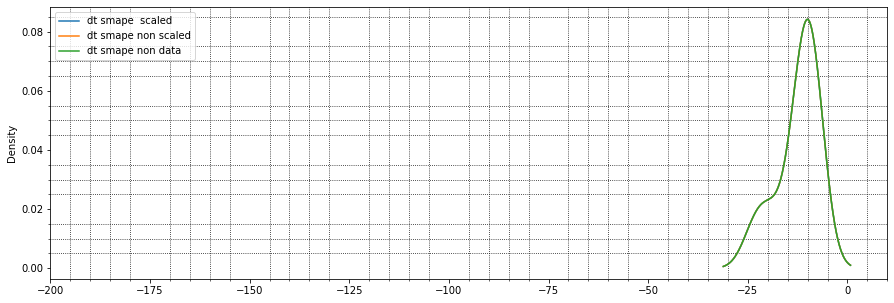

In [49]:
fig, ax = plt.subplots()
dt_smape_scaled.plot(kind = 'kde', figsize = (15,5), label = 'dt smape  scaled', grid = True)
dt_smape_nonscaled.plot(kind = 'kde', figsize = (15,5), label = 'dt smape non scaled', grid = True)
dt_smape.plot(kind = 'kde', figsize = (15,5), label = 'dt smape non data', grid = True)
ax.minorticks_on()
ax.grid(which='major',
        color = 'k', 
        linewidth = 2)
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.legend()
plt.xlim(-200,10)

plt.show()

Обучим модель дерево решений для признака 'rougher.output.recovery' 

In [50]:
rf_model =RandomForestRegressor(random_state = 12345)
rf_fit = rf_model.fit(features_train_1, target_train_1)
rf_scores = cross_val_score(rf_fit, features_train_1, target_train_1, cv = 10,
                                   scoring = smape_score)
rf_smape = pd.Series(rf_scores)

print(rf_smape)
print(np.mean(rf_smape))

0   -13.893410
1    -9.355625
2    -9.046563
3    -8.397993
4   -12.703849
5   -22.274805
6   -17.183632
7   -18.401465
8    -6.284963
9    -6.526812
dtype: float64
-12.40691172463786


Обучим модель линейной регресии  для признака 'rougher.output.recovery'

In [51]:
lr = LinearRegression()
lr_fit = lr.fit(features_train_1, target_train_1)
predict_lr = lr.predict(features_train_1)
lr_scores = cross_val_score(lr_fit, features_train_1, target_train_1, cv = 10,
                                   scoring = smape_score)

lr_smape = pd.Series(lr_scores)

print(lr_smape)
print(np.mean(lr_smape))

0   -11.108709
1    -8.680709
2    -8.860888
3    -7.178409
4   -11.555065
5   -19.502634
6   -11.466128
7   -18.597205
8    -7.296369
9    -9.760631
dtype: float64
-11.400674558143319


In [52]:
lr_fit_nonscaled = lr.fit(features_train_nonscaled_1, target_train_nonscaled_1)
lr_scores_nonscaled = cross_val_score(lr_fit_nonscaled, features_train_nonscaled_1, target_train_nonscaled_1, cv = 10,
                                   scoring = smape_score)
lr_smape_nonscaled = pd.Series(lr_scores_nonscaled)

print(lr_smape_nonscaled)
print(np.mean(lr_smape_nonscaled))

0    -9.467350
1    -8.685556
2    -8.520598
3    -7.553260
4   -10.891012
5   -18.999635
6   -11.887453
7   -18.851902
8    -7.482897
9    -6.176750
dtype: float64
-10.85164134494114


Построим распределение параметров sMAPE в результате кросс-валидации

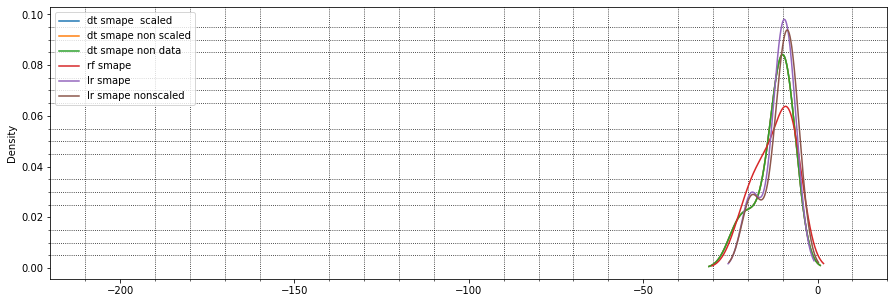

In [53]:
fig, ax = plt.subplots()
dt_smape_scaled.plot(kind = 'kde', figsize = (15,5), label = 'dt smape  scaled', grid = True)
dt_smape_nonscaled.plot(kind = 'kde', figsize = (15,5), label = 'dt smape non scaled', grid = True)
dt_smape.plot(kind = 'kde', figsize = (15,5), label = 'dt smape non data', grid = True)
rf_smape.plot(kind = 'kde', figsize = (15,5), label = 'rf smape', grid = True)
lr_smape.plot(kind = 'kde', figsize = (15,5), label = 'lr smape', grid = True)
lr_smape_nonscaled.plot(kind = 'kde', figsize = (15,5), label = 'lr smape nonscaled', grid = True)

ax.minorticks_on()
ax.grid(which='major',
        color = 'k', 
        linewidth = 2)
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.legend()
plt.xlim(-220,20)
plt.show()

По графику распределения sMAPE видим, что распределение линейной регрессии и распределение без даты стремится к нормальному распределению

Определим признаки для обучения модели дерево решений и предсказания final.output.recovery

In [54]:
features_train_dt = features_train_1

features_train_dt.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,-500.727997,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,-500.888152,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Обучим модель дерево решений для признака 'final.output.recovery'

In [55]:
dt_2 = DecisionTreeRegressor(random_state = 12345, max_depth = 1, min_samples_leaf = 0.5 )
dt_fit_2 = dt_2.fit(features_train_dt, target_train_2)

dt_scores_2 = cross_val_score(dt_2, features_train_dt, target_train_2, cv = 10, scoring = smape_score)


smape_dt_2 = pd.Series(dt_scores_2)
print(smape_dt_2, np.mean(smape_dt_2))

0   -10.187414
1    -9.962299
2   -10.518128
3    -8.634511
4   -10.245082
5   -12.260065
6   -12.920798
7   -10.962076
8   -10.939620
9   -11.257760
dtype: float64 -10.78877524946531


Определение признака для обучения модели линейной регресий  final.output.recovery

In [56]:
features_train_2 = features_train_1
features_train_2.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,-500.727997,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,-500.888152,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Обучим модель линейной регресси для признака 'final.output.recovery'

In [57]:
lr_2 = LinearRegression( )
lr_fit_2 = lr_2.fit(features_train_2, target_train_2)

lr_scores_2 = cross_val_score(lr_2, features_train_2, target_train_2, cv = 10, scoring = smape_score)


smape_lr_2 = pd.Series(lr_scores_2)
print(smape_lr_2, np.mean(smape_lr_2))

0   -10.627441
1   -10.845907
2   -12.575523
3    -8.883777
4   -11.626625
5   -11.309435
6   -12.252283
7    -9.219221
8   -10.377914
9   -17.966449
dtype: float64 -11.568457501528275


Построим распределение параметров sMAPE в результате кросс валидации при предсказании final.output.recovery

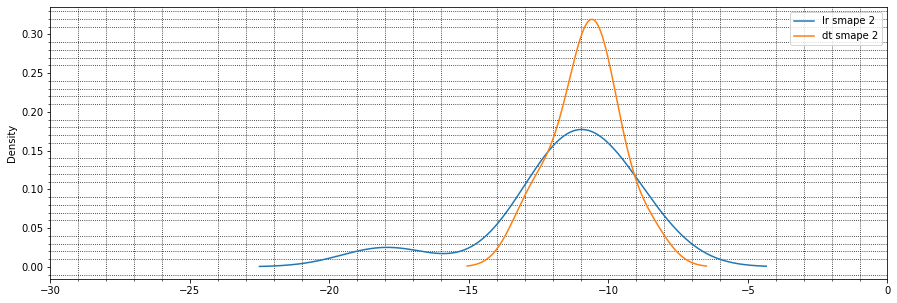

In [58]:
fig, ax = plt.subplots()
smape_lr_2.plot(kind = 'kde', figsize = (15,5), label = 'lr smape 2', grid = True)
smape_dt_2.plot(kind = 'kde', figsize = (15,5), label = 'dt smape 2', grid = True)
ax.minorticks_on()
ax.grid(which='major',
        color = 'k', 
        linewidth = 2)
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.legend()
plt.xlim(-30,0)

plt.show()

По результатам кросс валидации удалось выяснить, что лучшая модель получается при обучении использяю датасет без информации о дате и без масштабирования.

Для проверки модели на тестовой выборке нужно восстановить столбец с информацией о дате

In [59]:
TEST_DATA_date = TEST_DATA_filled['date']

FULL_DATA_date = FULL_DATA['date']

TEST_DATA_from_FULL_DATA = FULL_DATA_filled[FULL_DATA_date.isin(TEST_DATA_date)]
TEST_DATA_from_FULL_DATA.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
4682,2016-09-01 00:59:59,7.578381,10.466295,11.990938,40.743891,70.273583,12.688885,3.844413,11.075686,4.537988,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
4683,2016-09-01 01:59:59,7.813838,10.581152,12.216172,39.604292,68.910432,12.829171,3.918901,11.132824,4.675117,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
4684,2016-09-01 02:59:59,7.623392,10.424024,12.313710,40.724190,68.143213,12.977846,4.026561,10.990134,4.828907,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
4685,2016-09-01 03:59:59,8.552457,10.503229,13.074570,39.290997,67.776393,12.451947,3.780702,11.155935,4.969620,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4686,2016-09-01 04:59:59,8.078781,10.222788,12.475427,40.254524,61.467078,11.827846,3.632272,11.403663,5.256806,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


### Проверка модели на тестовой выборке

In [60]:
TEST_DATA_filled.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


Выдедим признаки из тестового датасета

In [61]:
features_test = TEST_DATA_filled.drop('date', axis =1 )

Обучим выбранную нами модель на тестовой выборке

In [62]:
dt_model = DecisionTreeRegressor(random_state = 12345, max_depth = 1, min_samples_leaf = 0.5 )
dt_model.fit(features_train_1, target_train_1)

DecisionTreeRegressor(max_depth=1, min_samples_leaf=0.5, random_state=12345)

Предскажем rougher.output.recovery по тестовой выборке

In [63]:
predict_dt_test = pd.Series(dt_model.predict(features_test))
predict_dt_test.describe()

count    5290.000000
mean       82.704502
std         0.000000
min        82.704502
25%        82.704502
50%        82.704502
75%        82.704502
max        82.704502
dtype: float64

Чтобы проверить качество модели восстановим целевой признак из общего датасета

In [64]:
TEST_DATA_for_target = TEST_DATA.merge(FULL_DATA.loc[:,['date', "rougher.output.recovery", "final.output.recovery"]], on= 'date')
TEST_DATA_for_target.head(2)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2016-09-01 00:59:59,210.800909,14.993118,8.08,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
1,2016-09-01 01:59:59,215.392455,14.987471,8.08,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,88.089657,68.910432


Целевой признак из тестовой выборки

In [65]:
target_test_1 = TEST_DATA_for_target['rougher.output.recovery']

target_test_1.describe()

count    5290.000000
mean       84.997810
std        13.077651
min         0.000000
25%        84.509308
50%        87.388553
75%        89.734185
max        99.169699
Name: rougher.output.recovery, dtype: float64

Вычислим sMAPE для rougher.output.recovery на тестовой выборке

In [66]:
smape_dt_test = smape(target_test_1 , predict_dt_test )

smape_dt_test

10.3797992834387

Проверим результат на адекватность. Для этого создадим массив среднего значения целевого признака и вычислим sMAPE на массив постоянного значения rougher.output.recovery

In [67]:
constant_prediction_dt = pd.Series([np.mean(target_train_1)]*len(target_test_1))
smape_dt_cons = smape(target_test_1, constant_prediction_dt)
smape_dt_cons

10.379799283438494

In [68]:
target_test_2 = FULL_DATA_filled[FULL_DATA_date.isin(TEST_DATA_date)]['final.output.recovery']
target_test_2.describe()

count    5290.000000
mean       68.471462
std         9.513871
min         0.000000
25%        65.508598
50%        69.815413
75%        73.288544
max       100.000000
Name: final.output.recovery, dtype: float64

Сформируем датафрейм rougher.ouput.recovery для предсказания final.output.recovery

In [69]:
df_predict_test = pd.DataFrame(predict_dt_test, index = features_test.index , columns = ['rougher.output.recovery_dt'])
df_predict_test.head()

,rougher.output.recovery_dt
0,82.704502
1,82.704502
2,82.704502
3,82.704502
4,82.704502


На основе предсказания модели rougher.output.recovery назначим признаки для предсказания final.output.recovery

In [70]:
features_test_2_dt = features_test.join(df_predict_test)

Обучим модель с подобранными гиперпараметрами для предсказания final.output.recovery

In [71]:
df_predict_test = pd.DataFrame(predict_dt_test, index = features_test.index , columns = ['rougher.output.recovery_dt'])
df_predict_test.head()

,rougher.output.recovery_dt
0,82.704502
1,82.704502
2,82.704502
3,82.704502
4,82.704502


Назначим признаки для предсказания final.output.recovery на основе предсказания модели rougher.output.recovery

In [72]:
features_test_2_dt = features_test

Обучим модель с подобраными гиперпараметрами для предсказания final.output.recovery

In [73]:
dt_2 = DecisionTreeRegressor(random_state = 12345, max_depth = 1, min_samples_leaf = 0.5 )
dt_2.fit(features_train_dt, target_train_2)

predict_test_dt_final = dt_2.predict(features_test_2_dt)

Вычислим sMAPE final.output.recovery

In [74]:
final_smape_dt = smape(target_test_2, predict_test_dt_final)
final_smape_dt

10.259574073548603

Расчитаем sMAPE для тестовой выборки на модели дерево решений

In [75]:
total_smape_dt = final_smape(smape_dt_test, final_smape_dt)

print( "SMAPE Decision tree regression: {}".format(final_smape_dt.round(2)), "%")

SMAPE Decision tree regression: 10.26 %


Для проверки на адекватность создадим постоянную модель

In [76]:
constant_prediction_dt_final = pd.Series([np.mean(target_train_2)]*len(target_test_2))
smape_dt_cons_final = smape(target_test_2, constant_prediction_dt_final)
print( "SMAPE final.output.recovery average : {}".format(smape_dt_cons_final.round(2)), "%")

SMAPE final.output.recovery average : 1.08 %


И расчитаем итоговый sMAPE

In [77]:
total_smape_const = final_smape(smape_dt_cons, smape_dt_cons_final)

print( "Total SMAPE average model, sanity test  : {}".format(total_smape_const.round(2)), "%")

Total SMAPE average model, sanity test  : 3.4 %


При сравнении результата sMAPE с моделью, которая выдает среднее значение с моделью дерева решений было выяснено, что значения SMAPE модели дерева решении немногим больше, что свидетельствует об адекватности модели!

# Вывод

В данном проекте были проделаны следующие действия:

- были открыты и изучены на предмет дубликатов, пропущенных и нулевых значений предоставленные датасеты;
- было проверено качество расчета эффективности обогащения, вычислена на обучающей выборке для признака rougher.output.recovery, найдена MAE между нашими расчётами и значением признака;
- были проанализированы признаки, недоступные в тестовой выборке;
- была проведена предобраотка данных;
- было изучено как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки;
- сравнили распределения размеров гранул сырья на обучающей и тестовой выборках;
- исследовали суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах;
- построили модель;
- написали функцию для вычисления sMAPE;
-обучили разные модели и оцените их качество кросс-валидацией, выбрали лучшую модель и проверили её на тестовой выборке;
- при сравнении результата sMAPE с моделью, которая выдает среднее значение с моделью дерева решений было выяснено, что значения SMAPE модели дерева решении немногим больше, что свидетельствует об адекватности модели!